# Use this link to open the notebook in Google Colab

Google Colab provides a preconfigured environment and free access to a GPU

[Google Colab Notebook](https://colab.research.google.com/drive/1ebtUmUJWTu_wngIHlm05Bo3cokVUdjld#scrollTo=XIUhK_IbjLBG)

# Import necessary libraries



In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

# Get the data



In [2]:
# Problem parameters
num_classes = 10
input_shape = (28, 28, 1)

# Split into training and testing
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Visualizing the data

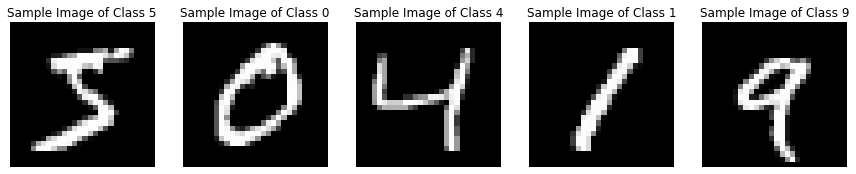

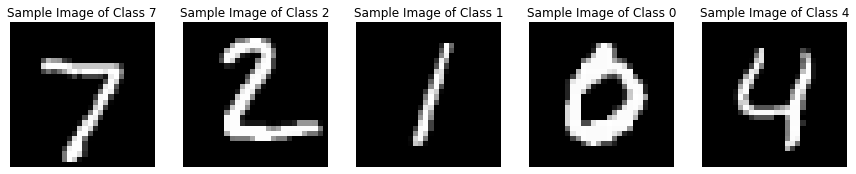

In [3]:
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('Sample Image of Class {}'.format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis("off")
plt.show()
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('Sample Image of Class {}'.format(y_test[i]))
    plt.imshow(x_test[i], cmap='gray')
    plt.axis("off")
plt.show()

# Prepare the data

In [4]:
# Standard Normalization to have mean = 0 and std = 1
x_train = (x_train - np.mean(x_train))/ np.std(x_train)
x_test = (x_test - np.mean(x_test))/ np.std(x_test)


# Reshape into TF format (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# Convert labels into one-hot encodings (3 = [0 0 1 0 0 0 0 0 0 0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


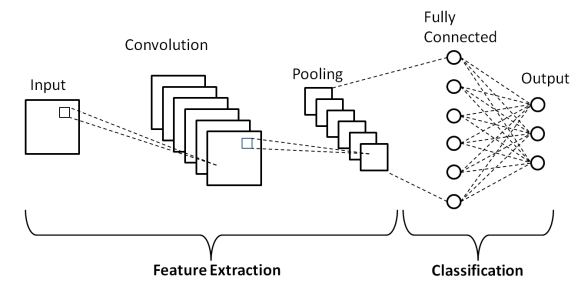

[Phung, & Rhee,. (2019). A High-Accuracy Model Average Ensemble of Convolutional Neural Networks for Classification of Cloud Image Patches on Small Datasets. Applied Sciences. 9. 4500. 10.3390/app9214500. ](https://www.researchgate.net/figure/Schematic-diagram-of-a-basic-convolutional-neural-network-CNN-architecture-26_fig1_336805909)


# Build the model

Convolutional layers tend to be used in the first layers

Pooling layers are used to reduce the size of the features while keeping most of the information

Batch normalization layers are used to make it easier for optimization

Flatten layers reshape the data into a single vector.

Dropout layers are used only in training to reduce overfitting.

Dense layers are fully connected layers (like in a standard ANN).



In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters = 6, kernel_size=(5, 5), activation="relu"), #,kernel_regularizer=regularizers.l2(0.0001)
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(rate = 0.1),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 864)               0         
_________________________________________________________________
dropout (Dropout)            (None, 864)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8650      
Total params: 8,830
Trainable params: 8,818
Non-trainable params: 12
_____________________________________________________

# Train the model

Cross entropy is the function that will be optimized: https://gombru.github.io/2018/05/23/cross_entropy_loss/

Adam is the optimization algorithm used to find the weights: https://ruder.io/optimizing-gradient-descent/index.html#adam

The learning rate commands how much the weights are updated: https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

In [13]:
batch_size = 128
epochs = 5
# optimizer
opt = keras.optimizers.Adam(learning_rate=0.3)
loss_fn = keras.losses.CategoricalCrossentropy()
model.compile(loss=loss_fn, optimizer=opt, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 2s 4ms/step - loss: 2.9956 - accuracy: 0.9358 - val_loss: 0.9752 - val_accuracy: 0.9757
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 3.3610 - accuracy: 0.9432 - val_loss: 5.0172 - val_accuracy: 0.9698
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 3.7110 - accuracy: 0.9507 - val_loss: 0.7939 - val_accuracy: 0.9552
Epoch 4/5
422/422 [==============================] - 1s 3ms/step - loss: 1.3006 - accuracy: 0.9640 - val_loss: 0.9297 - val_accuracy: 0.9735
Epoch 5/5
422/422 [==============================] - 1s 3ms/step - loss: 1.2115 - accuracy: 0.9590 - val_loss: 3.3462 - val_accuracy: 0.9682


# Evaluate the trained model

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.9041333198547363
Test accuracy: 0.9596999883651733


# Save and load the model

In [15]:
# Save to folder
model.save('models/mnist_model')\

# Load from folder
model = keras.models.load_model('models/mnist_model')
model.summary()


INFO:tensorflow:Assets written to: models/mnist_model/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 864)               0         
_________________________________________________________________
dropout (Dropout)            (None, 864)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8650      
Total params: 8,830
Trainable params: 8,818
Non-trainable par

# Class Activity

The model is not performing as well as we want it to! Lets try improving it by updating the network.

Try tuning the following parameters. Ask us if you are unsure what they do!

* learning rate
* number of neurons/channels
* layers (Conv layers, dense layers, normalization layers, pooling layers): https://keras.io/api/layers/
* kernel size (small kernel sizes perform better most of the time)
* dropout rate
* optimizer (SGD, RMSprop): https://keras.io/api/optimizers/adam/
* number of epochs (how many iterations it will train)

You can find an architecture for MNIST online and replicate it here

Make sure to keep the output neurons the same and the output activation function as softmax. You can use other activation functions for the other layers (relu, tanh, elu)

The goal is to get 0.985+ accuracy


BONUS: Using SVM to solve MNIST

SVMs are good when there is not enough data for neural nets.

They are easy to implement with the scikit-learn library and have less parameters to tune. In this example we will use the default settings to see if that is any good.

Information on SVMs: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/#:~:text=A%20support%20vector%20machine%20

In [ ]:
from sklearn import svm
from tensorflow import keras # we import this only for the dataset

# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# initialize model and put hyperparameters
# we set max_iter = 100 to not wait a long time. This will cause to stop before it converges to an optimal solution.
clf = svm.SVC(max_iter = 100)

# train and predict
y_predict = clf.fit(x_train.reshape(x_train.shape[0], -1), y_train).predict(x_test.reshape(x_test.shape[0], -1))

# calculate accuracy
print(f"Accuracy: {np.sum(np.equal(y_predict,y_test)/y_predict.shape[0])}")



11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.9271000000000003
